In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import pathlib

In [2]:
data = pd.read_csv("datos/runt_Diario.txt", sep = '\t')
segmentos = pd.read_csv('datos/Segmentos por modelo.csv')
precios = pd.read_csv('datos/Precios por modelo_prov.csv')

In [3]:
precios['FECHA'] =  pd.to_datetime(precios['FECHA'], infer_datetime_format=True)
data['Día natural']  = pd.to_datetime(data['Día natural'], infer_datetime_format=True)

In [4]:
#Compañias
data.Compañía.unique()

array(['YAMAHA', 'OTRAS', 'UMA', 'AUTECO', 'HONDA', 'HERO', 'AKT',
       'SUZUKI', 'MOBILITY', 'Sin asignar'], dtype=object)

In [5]:
#Marcas
data.Marca.unique()

array(['YAMAHA', 'BAJAJ', 'HONDA', 'AKT', 'SUZUKI', 'VICTORY', 'TVS',
       'HERO', 'KYMCO', 'KTM', 'BENELLI', 'ROYAL ENFIELD', 'KAWASAKI',
       'SYM', 'PIAGGIO', 'HM HONDA', 'SIN DEFINIR', 'HUSQVARNA', 'HAOJUE',
       'AYCO', 'VESPA', 'TONGKO', 'ZAGA', 'BADER', 'AVA MOTORS', 'WEST',
       'LINTEX', 'BK MOTO', 'SUPER SOCO', 'GVMCO', 'TVS-TYRES', 'APRILIA',
       'BOSS ATV', 'MOTO ABC', 'POLARIS', 'LARETTO', 'ZNEN', 'JIALING',
       'UM', 'YGM', 'KAZUKI', 'UNITED MOTORS', 'LML', 'MV AGUSTA',
       'CAN-AM', 'SENKE', 'BETA', 'TX MOTORS', 'BOSS', 'TRIUMPH', 'ASA',
       'LINHAI', 'ELEKTROMOTORES', 'MOTO GUZZI', 'N.S.U', 'LMX',
       'REVOLUTION 250', 'SCOMADI', 'STARKER', 'ARCTIC CAT', 'HUSABERG',
       'LIFAN', 'HUASHA', 'WEST PANTERA', 'SUNRA', 'JINLING',
       'HARLEY DAVIDSON', 'BRP/CAN AM', 'MACBOR', 'CFMOTO', 'DUCATI',
       'SIGMA', 'KEEWAY', 'BMW', 'NIU', 'VOLTA', 'ENERGY MOTION',
       'BIOLOGICA', 'ZERO', 'E-RACE', 'WOLF', 'ELECTRIC E-BIKE GX',
       'ELECTRIKA', 

In [6]:
#Modelo
#Modelo = data.Modelo.unique()
#for i in range(len(Modelo)):
    #print(Modelo[i])

In [7]:
data.groupby('Compañía').count()

,Categoría,Combustible,Día natural,Marca,Modelo,Cant. Total
Compañía,,,,,,
AKT,360900,360900,360900,360900,360900,360900
AUTECO,302695,302695,302695,302695,302695,302695
HERO,109481,109481,109481,109481,109481,109481
HONDA,291653,291653,291653,291653,291653,291653
MOBILITY,346095,346095,346095,346095,346095,346095
OTRAS,32513,32513,32513,32513,32513,32513
SUZUKI,260329,260329,260329,260329,260329,260329
Sin asignar,29,29,29,29,29,29
UMA,277154,277154,277154,277154,277154,277154


## Eliminacion de Outliers

In [8]:
#Eliminamos de dataframe algunos registros erroneos
new_data = data[~(data.Modelo.isin(['#', 'NO TIENE', 'SIN REFERENCIA', 'SIN DEFINIR'])) & ~(data.Compañía.isin(['Sin asignar', 'OTRAS'])) & ~(data.Marca.isin(['Sin asignar', 'SIN DEFINIR']))].reset_index(drop=True)

In [9]:
new_data

,Categoría,Combustible,Compañía,Día natural,Marca,Modelo,Cant. Total
0,MOTORCYCLES,GASOLINA,YAMAHA,2021-03-16,YAMAHA,XTZ125,1
1,MOTORCYCLES,GASOLINA,YAMAHA,2021-03-16,YAMAHA,XTZ125,1
2,MOTORCYCLES,GASOLINA,YAMAHA,2021-03-16,YAMAHA,XTZ125,1
3,MOTORCYCLES,GASOLINA,YAMAHA,2021-03-16,YAMAHA,XTZ125,1
4,MOTORCYCLES,GASOLINA,YAMAHA,2021-03-16,YAMAHA,XTZ125,1
...,...,...,...,...,...,...,...
2354657,MOTORCYCLES,GASOLINA,UMA,2022-10-01,BAJAJ,CT100 KS SPOKE,4
2354658,MOTORCYCLES,GASOLINA,UMA,2022-10-04,BAJAJ,CT100 KS SPOKE,4
2354659,MOTORCYCLES,GASOLINA,UMA,2022-10-07,BAJAJ,CT100 KS SPOKE,4
2354660,MOTORCYCLES,GASOLINA,UMA,2022-10-26,BAJAJ,CT100 KS SPOKE,4


### Filtro por Sub segmentos

In [10]:
df_segmento = segmentos[(segmentos.subsegmento == 'COMMUTER ENTRY')].reset_index(drop=True)
df_segmento_list = df_segmento.Modelo.unique()

In [11]:
df_segmento_list

array(['AK 125 SL', 'AK125 NE', 'AK125 NKDR', 'AK125CR4', 'AK125CR4 EIII',
       'AK125NKD EIII', 'AK125RL', 'AX 100', 'AX 4', 'AX4 EVOLUTION',
       'AY 125 2EV', 'AY 125-7', 'AY100', 'BOMBER 125',
       'BOXER BM100 CLASSIC ES', 'BOXER CARGO CT 100',
       'BOXER CARGO CT 100 AHO', 'BOXER CARGO CT 100 ES', 'BOXER CT 100',
       'BOXER CT 100 AHO', 'BOXER CT 100 ED. ANIVER', 'BOXER CT 100 ES',
       'BOXER CT 100 ES TITANNIUM', 'BOXER CT 100 KS',
       'BOXER CT 100 TITANNIUM', 'BOXER CT 125 ES', 'BOXER S', 'BS125',
       'CB 110', 'CB 110 DLX', 'CITY100', 'COMBAT 125', 'CT100 ES ALLOY',
       'CT100 ES SPOKE', 'CT100 KS SPOKE', 'CT125', 'CT125 ALLOY',
       'DISCOVER 100 SPORT', 'DISCOVER 100S', 'DISCOVER 110',
       'DISCOVER 125 UG', 'DISCOVER 125 UG CBS', 'DREAM NEO',
       'DREAM NEO ACTIVA', 'ECO', 'ECO 100', 'ECO DELUXE',
       'ECO DELUXE CW', 'ECO DELUXE ES', 'ECO DELUXE I3S',
       'ECO DELUXE SP', 'GE110', 'GLAMOUR', 'GN 125', 'GN125H', 'GV-100',
       'HAYAT

In [12]:
data_segmento = new_data[(new_data.Modelo.isin(df_segmento_list))].reset_index(drop=True)
precios_segmento = precios[(precios.MODELO.isin(df_segmento_list))].reset_index(drop=True)

In [13]:
#precios_segmento.FECHA.unique()

In [14]:
#Filtramo los datos a partir del 2021 (Post-pandemia)
data_segmento = data_segmento[(data_segmento['Día natural'].dt.year > 2020)].reset_index(drop=True)
#Ordenamos los datos cronologicamente
data_segmento = data_segmento.sort_values('Día natural').reset_index(drop=True)
#Filtramo los datos a partir del 2021 (Post-pandemia)
precios_segmento = precios_segmento[(precios_segmento['FECHA'].dt.year > 2020)].reset_index(drop=True)
#Ordenamos los datos cronologicamente
precios_segmento = precios_segmento.sort_values('FECHA').reset_index(drop=True)

In [15]:
Modelos_entry = precios_segmento.MODELO.unique()
data_segmento = data_segmento[(data_segmento.Modelo.isin(Modelos_entry))].reset_index(drop=True)

In [16]:
data_compañia = data_segmento.groupby(['Compañía', 'Marca', 'Modelo']).agg({'Cant. Total': 'count'})

In [17]:
for i in range(len(data_compañia)):
    print('Referencia: {}, Cant Total = {}'.format(data_compañia.index[i], data_compañia['Cant. Total'][data_compañia.index[i]]))

Referencia: ('AKT', 'AKT', 'AK125CR4'), Cant Total = 5
Referencia: ('AKT', 'AKT', 'AK125CR4 EIII'), Cant Total = 31246
Referencia: ('AKT', 'AKT', 'AK125NKD EIII'), Cant Total = 84397
Referencia: ('AKT', 'TVS', 'SPORT 100 ELS'), Cant Total = 13
Referencia: ('AKT', 'TVS', 'SPORT ELS SPOKE'), Cant Total = 8
Referencia: ('AKT', 'TVS', 'SPORT KLS SPOKE'), Cant Total = 6
Referencia: ('AKT', 'TVS', 'STRYKER 125 NG'), Cant Total = 13
Referencia: ('AUTECO', 'BAJAJ', 'BOXER CT 100 ES'), Cant Total = 3150
Referencia: ('AUTECO', 'BAJAJ', 'BOXER CT 100 ES TITANNIUM'), Cant Total = 932
Referencia: ('AUTECO', 'BAJAJ', 'BOXER CT 100 KS'), Cant Total = 449
Referencia: ('AUTECO', 'BAJAJ', 'BOXER S'), Cant Total = 1026
Referencia: ('AUTECO', 'TVS', 'MAX125 SW'), Cant Total = 2205
Referencia: ('AUTECO', 'TVS', 'SPORT 100 ELS'), Cant Total = 26197
Referencia: ('AUTECO', 'TVS', 'SPORT 100 KLS'), Cant Total = 7026
Referencia: ('AUTECO', 'TVS', 'SPORT ELS SPOKE'), Cant Total = 5826
Referencia: ('AUTECO', 'TVS

In [18]:
week = []
for i in range(len(data_segmento)):
    week.append('{}-{}'.format(data_segmento['Día natural'][i].isocalendar()[0],data_segmento['Día natural'][i].isocalendar()[1]))

In [19]:
data_segmento['week'] = week

In [20]:
data_segmento

,Categoría,Combustible,Compañía,Día natural,Marca,Modelo,Cant. Total,week
0,MOTORCYCLES,GASOLINA,AUTECO,2021-01-04,BAJAJ,BOXER S,1,2021-1
1,MOTORCYCLES,GASOLINA,AKT,2021-01-04,AKT,AK125NKD EIII,1,2021-1
2,MOTORCYCLES,GASOLINA,AUTECO,2021-01-04,BAJAJ,BOXER CT 100 ES,1,2021-1
3,MOTORCYCLES,GASOLINA,AUTECO,2021-01-04,BAJAJ,BOXER CT 100 ES,1,2021-1
4,MOTORCYCLES,GASOLINA,AKT,2021-01-04,AKT,AK125NKD EIII,1,2021-1
...,...,...,...,...,...,...,...,...
448126,MOTORCYCLES,GASOLINA,UMA,2022-11-03,BAJAJ,CT125,1,2022-44
448127,MOTORCYCLES,GASOLINA,UMA,2022-11-03,BAJAJ,CT125,1,2022-44
448128,MOTORCYCLES,GASOLINA,UMA,2022-11-03,BAJAJ,CT125,1,2022-44
448129,MOTORCYCLES,GASOLINA,UMA,2022-11-03,BAJAJ,CT125,1,2022-44


In [22]:
precios_full = ['AK125CR4 EIII', 'ECO DELUXE CW', 'GN 125','BOXER S','YC110D (YC-Z)', 'SPORT 100 ELS' ] #AKT, Honda, Susuki, UMA, YAMAHA, Y=AUTECO

In [23]:
data_segmento_1 = data_segmento[(data_segmento.Modelo.isin(precios_full))].reset_index(drop=True)
precios_segmento_1 = precios_segmento[(precios_segmento.MODELO.isin(precios_full))].reset_index(drop=True)

In [24]:
precios_segmento_1

,MODELO,PRECIO,FECHA,VARIACION_PRECIO
0,YC110D (YC-Z),4750000,2021-01-01,0.0
1,SPORT 100 ELS,3890000,2021-01-01,0.0
2,AK125CR4 EIII,4690000,2021-01-01,0.0
3,GN 125,5188000,2021-01-01,0.0
4,AK125CR4 EIII,4690000,2021-01-02,0.0
...,...,...,...,...
3652,YC110D (YC-Z),6200000,2022-10-30,0.0
3653,AK125CR4 EIII,6640000,2022-10-30,0.0
3654,GN 125,6398000,2022-10-31,0.0
3655,AK125CR4 EIII,6640000,2022-10-31,0.0


In [25]:
price = []
for i in range(len(data_segmento_1)):
    list_tmp = []
    date_1 = data_segmento_1['Día natural'][i]
    df_tmp = precios_segmento_1[(precios_segmento_1.MODELO == data_segmento_1.Modelo[i])].reset_index(drop=True)
    for j in range(len(df_tmp)):
        date_2 = df_tmp['FECHA'][j]
        list_tmp.append(np.abs(date_1 - date_2))
    
    price.append(df_tmp.PRECIO[list_tmp.index(min(list_tmp))])

In [26]:
len(price)

141568

In [27]:
data_segmento_1['precio'] = price

In [29]:
#data_segmento_1

In [30]:
data_segmento_1.to_csv('final data/ALL_COMMUTER_ENTRY.csv', index=False)

In [31]:
weeks = data_segmento_1.week.unique()

In [32]:
data_segmento_1.Modelo.unique()

array(['BOXER S', 'YC110D (YC-Z)', 'AK125CR4 EIII', 'ECO DELUXE CW',
       'SPORT 100 ELS', 'GN 125'], dtype=object)

In [33]:
data_segmento_1[(data_segmento_1.Modelo == 'SPORT 100 ELS')].reset_index(drop=True)

,Categoría,Combustible,Compañía,Día natural,Marca,Modelo,Cant. Total,week,precio
0,MOTORCYCLES,GASOLINA,AUTECO,2021-01-05,TVS,SPORT 100 ELS,1,2021-1,3890000
1,MOTORCYCLES,GASOLINA,AUTECO,2021-01-05,TVS,SPORT 100 ELS,1,2021-1,3890000
2,MOTORCYCLES,GASOLINA,AUTECO,2021-01-05,TVS,SPORT 100 ELS,1,2021-1,3890000
3,MOTORCYCLES,GASOLINA,AUTECO,2021-01-05,TVS,SPORT 100 ELS,1,2021-1,3890000
4,MOTORCYCLES,GASOLINA,AUTECO,2021-01-05,TVS,SPORT 100 ELS,1,2021-1,3890000
...,...,...,...,...,...,...,...,...,...
26205,MOTORCYCLES,GASOLINA,AUTECO,2022-11-03,TVS,SPORT 100 ELS,1,2022-44,5999999
26206,MOTORCYCLES,GASOLINA,AUTECO,2022-11-03,TVS,SPORT 100 ELS,1,2022-44,5999999
26207,MOTORCYCLES,GASOLINA,AUTECO,2022-11-03,TVS,SPORT 100 ELS,1,2022-44,5999999
26208,MOTORCYCLES,GASOLINA,AUTECO,2022-11-03,TVS,SPORT 100 ELS,1,2022-44,5999999


In [34]:
results = []
for week in weeks:
    Moto_1 = data_segmento_1[(data_segmento_1.Modelo == 'AK125CR4 EIII') & (data_segmento_1.week == week)].reset_index(drop=True)
    Moto_2 = data_segmento_1[(data_segmento_1.Modelo == 'ECO DELUXE CW') & (data_segmento_1.week == week)].reset_index(drop=True)
    Moto_3 = data_segmento_1[(data_segmento_1.Modelo == 'GN 125') & (data_segmento_1.week == week)].reset_index(drop=True)
    Moto_4 = data_segmento_1[(data_segmento_1.Modelo == 'BOXER S') & (data_segmento_1.week == week)].reset_index(drop=True)
    Moto_5 = data_segmento_1[(data_segmento_1.Modelo == 'YC110D (YC-Z)') & (data_segmento_1.week == week)].reset_index(drop=True)
    target = data_segmento_1[(data_segmento_1.Modelo == 'SPORT 100 ELS') & (data_segmento_1.week == week)].reset_index(drop=True)
    
    result = {'date':week, 'AK125CR4 EIII(price)': np.mean(Moto_1['precio']),'ECO DELUXE CW(price)': np.mean(Moto_2['precio']), 
              'GN 125(price)': np.mean(Moto_3['precio']), 'BOXER S(price)': np.mean(Moto_4['precio']), 'YC110D (YC-Z)(price)': np.mean(Moto_5['precio']),
              'AK125CR4 EIII(unidades)': sum(Moto_1['Cant. Total']),'ECO DELUXE CW(unidades)': sum(Moto_2['Cant. Total']), 
              'GN 125(unidades)': sum(Moto_3['Cant. Total']), 'BOXER S(unidades)': sum(Moto_4['Cant. Total']), 'YC110D (YC-Z)(unidades)': sum(Moto_5['Cant. Total']),
              'SPORT 100 ELS(y)': sum(target['Cant. Total']), 'SPORT 100 ELS(price)': np.mean(target['precio'])}
    results.append(result)

In [35]:
df_COMMUTER_ENTRY = pd.DataFrame(results)

In [36]:
df_COMMUTER_ENTRY

,date,AK125CR4 EIII(price),ECO DELUXE CW(price),GN 125(price),BOXER S(price),YC110D (YC-Z)(price),AK125CR4 EIII(unidades),ECO DELUXE CW(unidades),GN 125(unidades),BOXER S(unidades),YC110D (YC-Z)(unidades),SPORT 100 ELS(y),SPORT 100 ELS(price)
0,2021-1,4.690000e+06,3750000.0,4.860694e+06,3.890000e+06,4.769595e+06,142,126,72,143,74,49,3.890000e+06
1,2021-2,4.690000e+06,3750000.0,5.238000e+06,3.890000e+06,4.800000e+06,108,180,88,171,94,98,3.890000e+06
2,2021-3,4.690000e+06,3750000.0,5.238000e+06,3.890000e+06,4.800000e+06,110,235,277,167,125,173,3.890000e+06
3,2021-4,4.690000e+06,3750000.0,5.238000e+06,3.890000e+06,4.800000e+06,151,228,321,135,118,220,3.890000e+06
4,2021-5,4.790000e+06,3750000.0,5.268362e+06,3.890000e+06,4.800000e+06,128,218,361,130,111,199,3.999000e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2022-40,6.490000e+06,5190000.0,6.335895e+06,4.628412e+06,6.126761e+06,237,114,460,52,71,52,5.769230e+06
92,2022-41,6.490000e+06,5190000.0,6.348000e+06,5.299000e+06,6.200000e+06,242,107,437,49,60,44,5.999999e+06
93,2022-42,6.490000e+06,5190000.0,6.385429e+06,5.299000e+06,6.200000e+06,198,110,355,37,67,35,5.999999e+06
94,2022-43,6.603319e+06,5190000.0,6.398000e+06,5.299000e+06,6.200000e+06,229,126,377,38,97,35,5.999999e+06


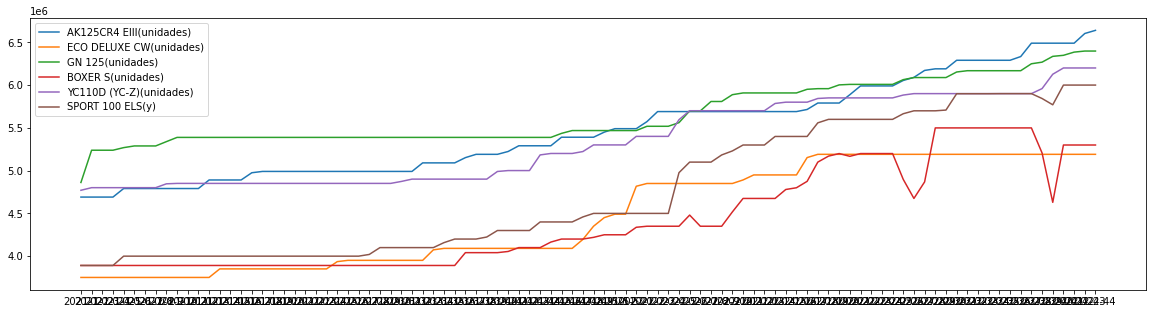

In [38]:
fig, ax = plt.subplots(figsize=(20,5))
ax.plot(df_COMMUTER_ENTRY.date, df_COMMUTER_ENTRY['AK125CR4 EIII(price)'], label = 'AK125CR4 EIII(unidades)')
ax.plot(df_COMMUTER_ENTRY.date, df_COMMUTER_ENTRY['ECO DELUXE CW(price)'], label = 'ECO DELUXE CW(unidades)')
ax.plot(df_COMMUTER_ENTRY.date, df_COMMUTER_ENTRY['GN 125(price)'], label = 'GN 125(unidades)')
ax.plot(df_COMMUTER_ENTRY.date, df_COMMUTER_ENTRY['BOXER S(price)'], label = 'BOXER S(unidades)')
ax.plot(df_COMMUTER_ENTRY.date, df_COMMUTER_ENTRY['YC110D (YC-Z)(price)'], label = 'YC110D (YC-Z)(unidades)')
ax.plot(df_COMMUTER_ENTRY.date, df_COMMUTER_ENTRY['SPORT 100 ELS(price)'], label = 'SPORT 100 ELS(y)')
plt.legend()
plt.show()

In [39]:
#df_COMMUTER_ENTRY.to_csv('final data/df_COMMUTER_ENTRY.csv', index = False)